In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/housingdata.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
data.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [ ]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non-null    float64
 2   INDUS    394 non-null    float64
 3   CHAS     394 non-null    float64
 4   NOX      394 non-null    float64
 5   RM       394 non-null    float64
 6   AGE      394 non-null    float64
 7   DIS      394 non-null    float64
 8   RAD      394 non-null    int64  
 9   TAX      394 non-null    int64  
 10  PTRATIO  394 non-null    float64
 11  B        394 non-null    float64
 12  LSTAT    394 non-null    float64
 13  MEDV     394 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 46.2 KB


In [ ]:
X = data[['TAX', 'AGE', 'RM','PTRATIO','CRIM']].values
y = data['MEDV'].values
X = np.column_stack((np.ones(X.shape[0]), X))
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[:, 1:] = scaler.fit_transform(X[:, 1:])

# Initialize model parameters
# Initialize model parameters with zeros
theta = np.zeros(X.shape[1])


# Set hyperparameters
alpha = 0.01
num_iterations = 1000
tolerance = 1e-6

In [ ]:
def hypothesis(X, theta):
    return np.dot(X, theta)

# Define the cost function (Mean Squared Error)
def cost_function(X, y, theta):
    m = len(y)
    h = hypothesis(X, theta)
    return (1 / (2 * m)) * np.sum((h - y) ** 2)

In [ ]:
def gradient_descent(X, y, theta, alpha, num_iterations, tolerance):
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        h = hypothesis(X, theta)
        gradient = (1 / m) * np.dot(X.T, (h - y))
        theta -= alpha * gradient
        cost = cost_function(X, y, theta)
        cost_history.append(cost)

        if i > 0 and abs(cost_history[i-1] - cost_history[i]) < tolerance:
            break

    return theta, cost_history

# Perform gradient descent
theta_custom, cost_history = gradient_descent(X, y, theta, alpha, num_iterations, tolerance)

# Print the final coefficients from the custom implementation
print("Custom Implementation Coefficients:", theta_custom)

Custom Implementation Coefficients: [22.35477619 -1.05518244 -1.07507656  4.992449   -1.99593125 -1.00143196]


In [ ]:
intercept_custom = theta_custom[0]
print("Custom Implementation Intercept:", intercept_custom)

Custom Implementation Intercept: 22.354776192575805


In [ ]:
#using scikit learn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

# Print the coefficients from Scikit-Learn
intercept_sklearn = model.intercept_
coefficients_sklearn = model.coef_
print("Scikit-Learn Intercept:", intercept_sklearn)
print("Scikit-Learn Coefficients:", coefficients_sklearn[1:])

Scikit-Learn Intercept: 22.359644670050763
Scikit-Learn Coefficients: [-1.04290077 -1.07879306  5.00044987 -1.99220737 -1.00940937]


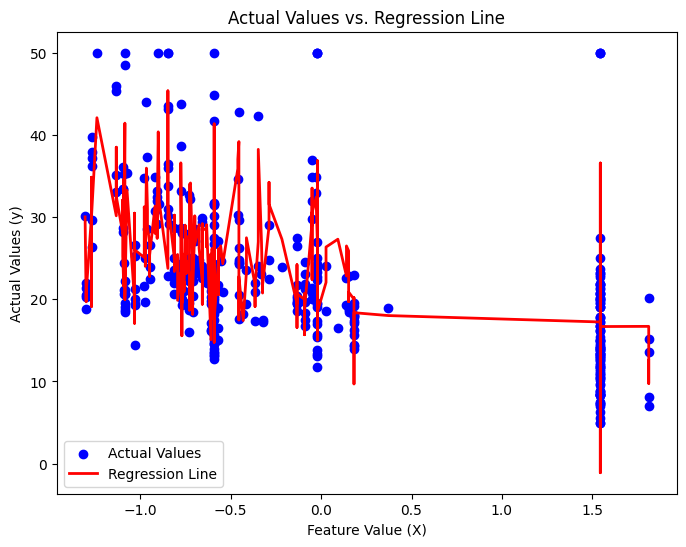

In [ ]:
sorted_indices = X[:, 1].argsort()
X_sorted = X[sorted_indices]
y_sorted = y[sorted_indices]

# Make predictions using the trained model
y_pred_custom = np.dot(X_sorted, theta_custom)

# Create a scatter plot of actual values
plt.figure(figsize=(8, 6))
plt.scatter(X_sorted[:, 1], y_sorted, c='b', label='Actual Values')

# Plot the regression line
plt.plot(X_sorted[:, 1], y_pred_custom, color='r', label='Regression Line', linewidth=2)

plt.xlabel('Feature Value (X)')
plt.ylabel('Actual Values (y)')
plt.title('Actual Values vs. Regression Line')
plt.legend()
plt.show()





Custom Implementation Intercept: 22.354776192575805
Initial Cost: 285.53729902407787
Final Cost: 13.955876050022466


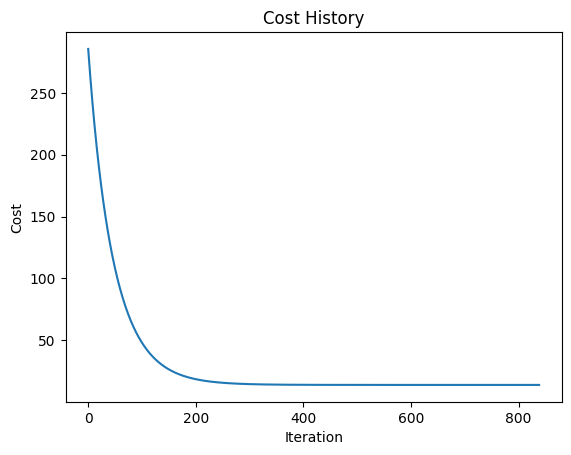

In [ ]:
intercept_custom = theta_custom[0]
print("Custom Implementation Intercept:", intercept_custom)

initial_cost=cost_history[0]
print("Initial Cost:", initial_cost)

final_cost = cost_history[-1]
print("Final Cost:", final_cost)

# Plot the cost history
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost History')
plt.show()